In [1]:
import numpy as np
from scipy import stats

In [2]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [3]:
x = np.random.randint(low = 50, high = 100, size = 20)

In [4]:
x

array([73, 90, 51, 73, 51, 78, 94, 96, 88, 70, 51, 57, 76, 78, 87, 51, 75,
       72, 64, 54])

In [32]:
# population mean
x.mean()

73.4

In [33]:
# population standard deviation
x.std()

11.757550765359253

In [34]:
# sample mean
smean = np.sum(x)/(x.size-1)

In [35]:
# sample standard deviation
np.std(x, ddof = 1)

12.06299255880083

In [9]:
stats.describe(x)

DescribeResult(nobs=20, minmax=(50, 93), mean=66.35, variance=161.60789473684213, skewness=0.5085436959009962, kurtosis=-0.8689881037787806)

In [44]:
# Compute the z score of each value in the sample, relative to the sample mean and standard deviation.
zscore = stats.zscore(sorted(x), ddof = 1)

In [45]:
zscore

array([-1.35324923, -1.35324923, -1.35324923, -1.35324923, -1.15472856,
       -0.95620789, -0.492993  , -0.09595166,  0.03639546,  0.10256901,
        0.10256901,  0.23491613,  0.30108968,  0.4334368 ,  0.4334368 ,
        1.02899881,  1.09517236,  1.22751948,  1.4922137 ,  1.62456082])

In [22]:
t = ((x-x.mean())/x.std(ddof=1))
t.sort(axis=0)
t

array([-1.35324923, -1.35324923, -1.35324923, -1.35324923, -1.15472856,
       -0.95620789, -0.492993  , -0.09595166,  0.03639546,  0.10256901,
        0.10256901,  0.23491613,  0.30108968,  0.4334368 ,  0.4334368 ,
        1.02899881,  1.09517236,  1.22751948,  1.4922137 ,  1.62456082])

In [23]:
t1 = np.array([[8,5,6],[2,3,1],[4,2,0]])
t1.sort(axis=0)
print(t1)
t1.sort(axis=1)
print(t1)

[[2 2 0]
 [4 3 1]
 [8 5 6]]
[[0 2 2]
 [1 3 4]
 [5 6 8]]


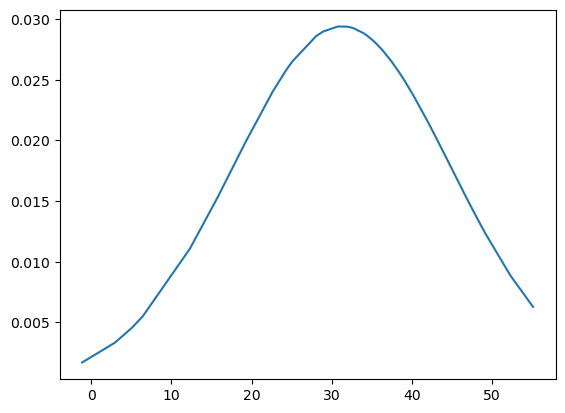

In [67]:
# yn = np.linspace(-3, 3, num = 50)
yn = np.random.normal(loc=30, scale=10, size=50)
yn.sort()
plt.plot(yn, stats.norm.pdf(yn, loc=np.mean(yn), scale=np.std(yn)))

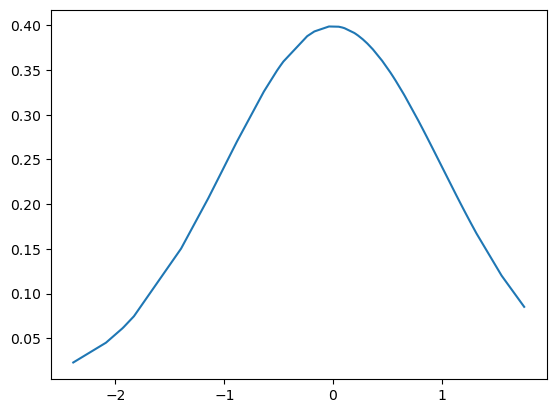

In [69]:
t3 = (yn-yn.mean())/yn.std()
plt.plot(t3, stats.norm.pdf(t3))

In [13]:
stats.normaltest(yn)

NormaltestResult(statistic=0.5156109183605251, pvalue=0.7727455480375255)

In [14]:
# confidence interval for a single draw
stats.norm.interval(0.95, loc  = np.mean(x), scale = np.std(x))

(42.064828205381836, 90.63517179461815)

In [15]:
# confidence interval for the mean of x.size draws
stats.norm.interval(0.95, loc  = np.mean(x), scale = np.std(x)/np.sqrt(x.size))

(60.91967050219732, 71.78032949780267)

In [16]:
stats.t.interval(0.95, loc  = smean, scale = np.std(x, ddof = 1), df = x.size-1)

(43.234517338906294, 96.44969318740948)

In [28]:
# Standard Normal Distribution (t, percentage points of Students t-distribution, when population standard deviation is not available)
# 95% confidence interval, one sided
# VISUALIZE normal distribution bell shape curve with skewness = 0, lower & upper half allocated 0.5 area each, integrating to total area = 1
# create two halves by dividing the confidence interval by 2, --> 0.95/2 = 0.475
# Allocate two halves to both side of normal distribution from center ---> VISUALIZE
# upper limit = 0.5 (lower) + 0.475 --> 0.975
# lower limit = 0.5 (lower) - 0.475 --> 0.025
# 0.975-0.025 = 0.95 = 95% Confidence Interval

# one sided lower
print('One sided lower: ' + str(stats.t.ppf(0.025, df=60)))

# one sided upper
print('One sided upper: ' + str(stats.t.ppf(0.975, df = 60))) # ---> df = degree of freedom, size-1

# Two sided, confidence interval with equal areas around the median.
print('Confidence interval: ' + str(stats.t.interval(0.95, df = 60)))

One sided lower: -2.000297821058262
One sided upper: 2.0002978210582616
Confidence interval: (-2.0002978210582616, 2.0002978210582616)


In [18]:
# Z-score, when population standard deviation is available.
# zscore value for 95% confidence for standard normal distribution for single side lower & upper
# 0.975-0.025 = 0.95 = 95%

print('One sided lower: {}  \nOne sided upper: {}'.format(stats.norm.ppf(0.025), stats.norm.ppf(0.975)))

# Two sided, confidence interval with equal areas around the median.
print("Confidence interval:( %f, %f)" % stats.norm.interval(0.95, loc = 0, scale = 1))

One sided lower: -1.9599639845400545  
One sided upper: 1.959963984540054
Confidence interval:( -1.959964, 1.959964)


In [23]:
# note this formula doesn't take into account number of samples
stats.norm.interval(0.95, loc  = np.mean(x), scale = np.std(x))

(42.064828205381836, 90.63517179461815)

In [24]:
2.15 - stats.norm.ppf(0.975) * 0.8/np.sqrt(75)

1.9689462825478126

In [25]:
# Z-score for 95% confidence interval - standard normal distribution
stats.norm.ppf(0.975)

1.959963984540054

In [26]:
# 95% confidence interval for x, this takes into account number of samples
np.mean(x)-stats.norm.ppf(0.975) * np.std(x)/np.sqrt(x.size), np.mean(x)+stats.norm.ppf(0.975) * np.std(x)/np.sqrt(x.size)

(60.91967050219732, 71.78032949780267)